In [34]:
from Precode2 import *
import numpy
import matplotlib.pyplot as plt

data = np.load('AllSamples.npy')

In [35]:
k1,i_point1,k2,i_point2 = initial_S2('4163')

Strategy 2: k and initial points


In [36]:
print(k1)
print(i_point1)
print(k2)
print(i_point2)

4
[6.79251832 2.56208095]
6
[5.68845261 8.27229082]


In [37]:
# generate random index
def initial_point_idx(id, k, N):
    random.seed((id+k))     
    return random.randint(0,N-1)

In [38]:
# generate initial centroid
def initial(id, k):
    i = int(id)%150 
    random.seed(i+800)
    init_idx = initial_point_idx(i,k,data.shape[0])
    init_s = data[init_idx,:]
    return init_s

In [39]:
# improve centroid initialization with k-means++
def kmeans_pp(k, data, init_c):
    c = init_c
    i = 1
    # pick 2nd centroid
    distance = np.sqrt(((data - c)**2).sum(axis=1))
    new_c = data[np.argmax(distance)]
    c = np.vstack([c, new_c])
    data_c = np.delete(data, np.argmax(distance), axis=0)
    # pick n more centroids
    n = k-2
    while i<=n:
        d = np.array([np.sqrt(((data_c - c[j])**2).sum(axis=1)) for j in range(c.shape[0])])
        avg = np.mean(d, axis=0 )
        new_c = data_c[np.argmax(avg)]
        c = np.vstack([c, new_c])
        data_c = np.delete(data_c, np.argmax(avg), axis=0)
        i += 1
    return(c)

In [40]:
# plot points and centroids
def plot_centroids(data, c, k):
    plt.scatter(data[:,0],data[:,1],c='black')
    plt.scatter([c[:,0]],[c[:,1]],c='red')
    plt.title('Initial Centroids: k = %i' % k)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [41]:
# classify samples according to nearest centroid
def cluster(data, centroids):
    distance = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distance, axis=0)

In [42]:
# recompute new centroids
def update_c(data, current, centroids):
    return np.array([data[current==k].mean(axis=0) for k in range(centroids.shape[0])])

In [43]:
# compute the objective function
def loss(data, cluster, centroids):
    var = np.array([sum((data[cluster==k] - centroids[k])**2) for k in range(centroids.shape[0])])
    return np.sum(var)

In [44]:
# Define the color-map
cmap = plt.cm.jet
# Extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# Create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# plot the assigned clusters
def plot_clusters(data, c, a):
    plt.scatter(data[:,0], data[:,1], c=a, cmap=cmap)
    plt.scatter(c[:, 0], c[:, 1], c = 'red')
    plt.title('Final Clusters')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()

In [45]:
# classify samples and recompute mean until mean no longer changes
def k_means(data, centroids):
    diff = 1
    j=0

    while(diff!=0):
        a = cluster(data, centroids)
        c = update_c(data, a, centroids)
    
        if j == 0:
            diff=1
            j=j+1
        else:
            diff = (c - centroids).sum()
        
        centroids = update_c(data, a, centroids)
    
    final_c = centroids
    final_cluster = a
    return final_c, final_cluster

In [46]:
# plot objective function vs k
def plot_loss(i, k, loss):
    plt.plot(k,loss,c='black')
    plt.title('K-Means++ Initialization %i' % i)
    plt.xlabel('Number of Clusters k')
    plt.ylabel('Sum of Squared Error')
    plt.show()

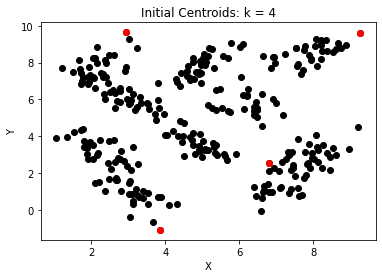

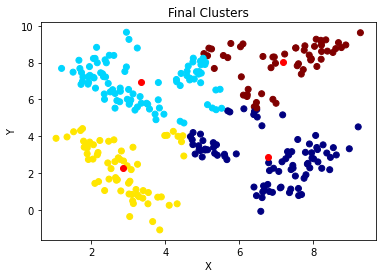

Final centroids:
 [[6.78374609 2.85019999]
 [3.34264769 6.92602803]
 [2.85235149 2.28186483]
 [7.17928621 8.0520791 ]]
Loss:
 805.1166457472611


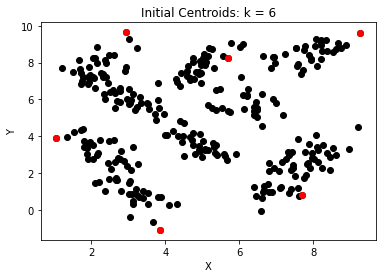

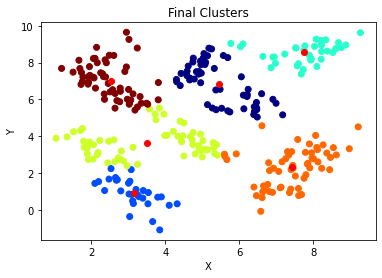

Final centroids:
 [[5.46427736 6.83771354]
 [3.14506148 0.90770655]
 [7.75648325 8.55668928]
 [3.502455   3.62870476]
 [7.41419243 2.32169114]
 [2.52382885 7.02897469]]
Loss:
 476.2965705269664


In [47]:
c_init = i_point1, i_point2
k_all = k1, k2
n = len(k_all)
#initialize k centroids
c1 = kmeans_pp(k_all[0], data, c_init[0])
c2 = kmeans_pp(k_all[1], data, c_init[1])
c_all = c1, c2
# print test results k = 4,6
err = np.empty(n)
for i in range(n):
    plot_centroids(data, c_all[i], k_all[i])
    result = k_means(data, c_all[i])
    final_c = result[0]
    final_cluster = result[1]
    err[i] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err[i])

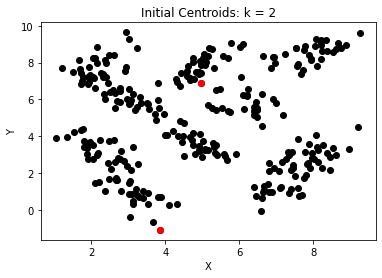

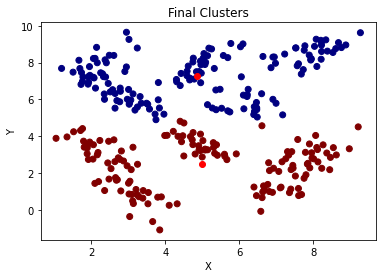

Final centroids:
 [[4.85261193 7.27164171]
 [5.00056234 2.48542748]]
Loss:
 1921.0334858562055


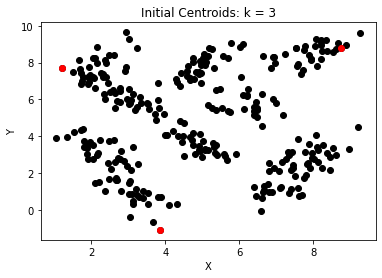

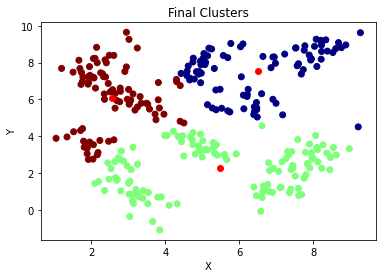

Final centroids:
 [[6.49724962 7.52297293]
 [5.47740039 2.25498103]
 [2.56146449 6.08861338]]
Loss:
 1293.777452391135


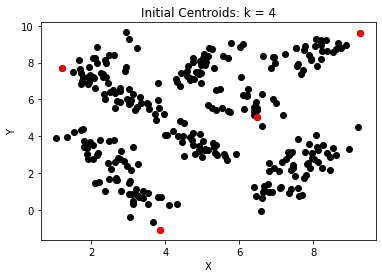

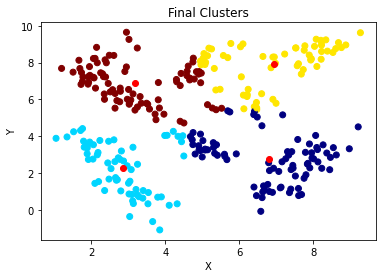

Final centroids:
 [[6.79532432 2.78778512]
 [2.85235149 2.28186483]
 [6.92822285 7.92187152]
 [3.19669343 6.8712608 ]]
Loss:
 803.2167238057568


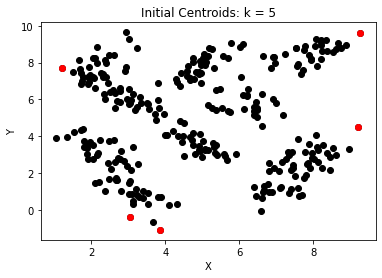

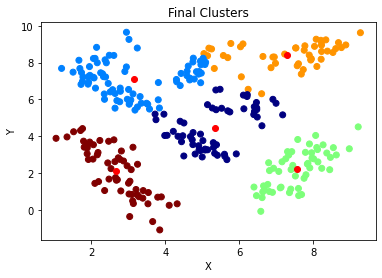

Final centroids:
 [[5.33907212 4.46551175]
 [3.15072761 7.12192906]
 [7.55616782 2.23516796]
 [7.29974969 8.41331838]
 [2.68198633 2.09461587]]
Loss:
 592.5283842592469


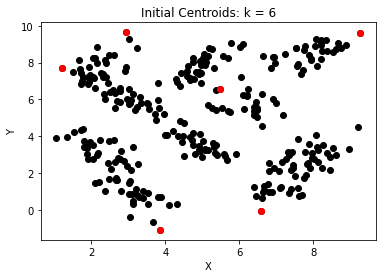

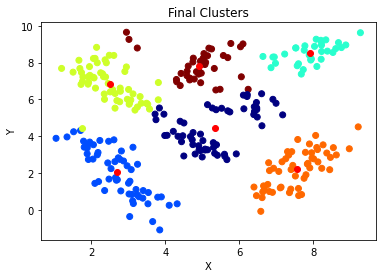

Final centroids:
 [[5.33214241 4.44448111]
 [2.69776781 2.05456448]
 [7.91430998 8.51990981]
 [2.50007776 6.83980802]
 [7.55616782 2.23516796]
 [4.92373109 7.83373154]]
Loss:
 469.13171566558196


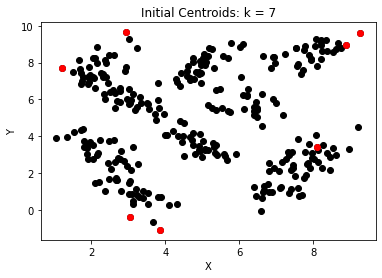

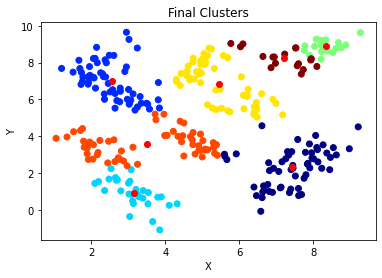

Final centroids:
 [[7.41419243 2.32169114]
 [2.56333815 6.9782248 ]
 [3.14506148 0.90770655]
 [8.33445692 8.88287655]
 [5.46427736 6.83771354]
 [3.49556658 3.56611232]
 [7.20892924 8.24766976]]
Loss:
 460.67976059432084


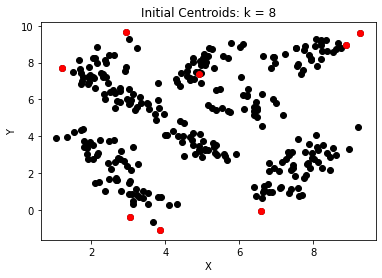

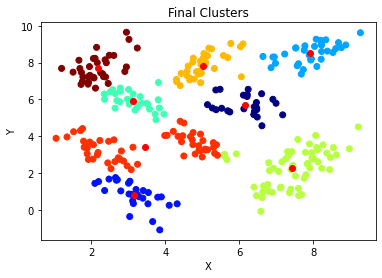

Final centroids:
 [[6.15468228 5.70140721]
 [3.16906145 0.81432515]
 [7.91430998 8.51990981]
 [3.13834768 5.93372322]
 [7.42803426 2.28291867]
 [5.0217766  7.82401258]
 [3.45611911 3.44222932]
 [2.18321462 7.70355341]]
Loss:
 340.98775369371583


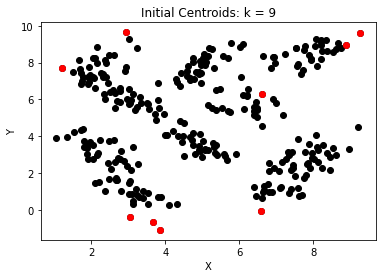

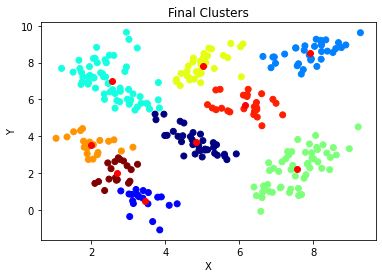

Final centroids:
 [[4.81833058 3.6950232 ]
 [3.44650803 0.47784504]
 [7.91430998 8.51990981]
 [2.56333815 6.9782248 ]
 [7.55616782 2.23516796]
 [5.0217766  7.82401258]
 [2.00857179 3.54850646]
 [6.15468228 5.70140721]
 [2.69805343 2.0242299 ]]
Loss:
 273.5730987887718


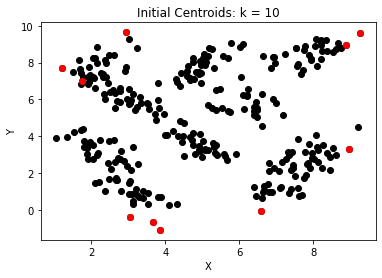

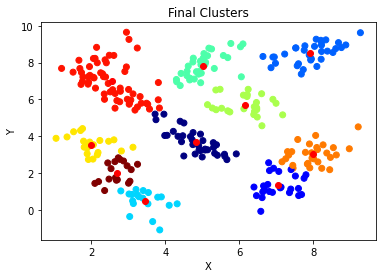

Final centroids:
 [[4.81833058 3.6950232 ]
 [7.05668293 1.33319679]
 [7.91430998 8.51990981]
 [3.44650803 0.47784504]
 [5.0217766  7.82401258]
 [6.15468228 5.70140721]
 [2.00857179 3.54850646]
 [7.98675824 3.01272931]
 [2.56333815 6.9782248 ]
 [2.69805343 2.0242299 ]]
Loss:
 224.08688719123074


In [48]:
# print results k = 2-10, init. 1
err_1 = np.empty(9)
for i in range(2,11):
    init_pt = initial(1, i)
    k_points = kmeans_pp(i, data, init_pt)
    plot_centroids(data, k_points, i)
    result = k_means(data, k_points)
    final_c = result[0]
    final_cluster = result[1]
    err_1[i-2] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err_1[i-2])

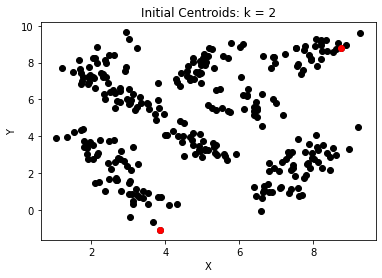

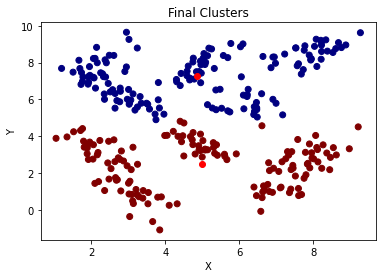

Final centroids:
 [[4.85261193 7.27164171]
 [5.00056234 2.48542748]]
Loss:
 1921.0334858562055


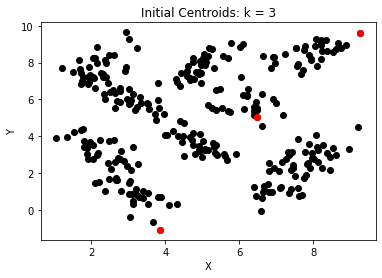

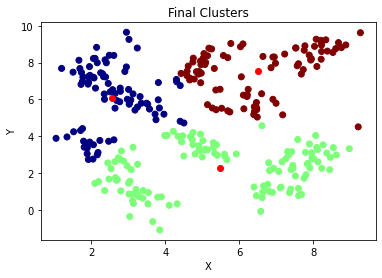

Final centroids:
 [[2.56146449 6.08861338]
 [5.47740039 2.25498103]
 [6.49724962 7.52297293]]
Loss:
 1293.777452391135


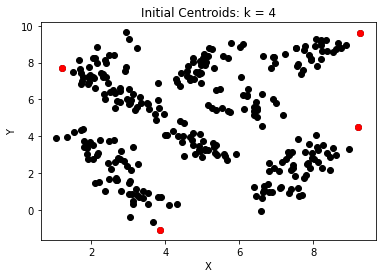

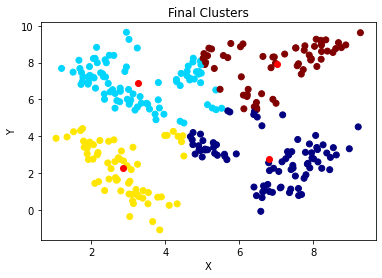

Final centroids:
 [[6.79532432 2.78778512]
 [3.26064423 6.89228928]
 [2.85235149 2.28186483]
 [7.01843543 7.94286001]]
Loss:
 803.6152031347865


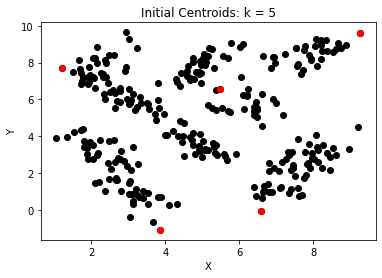

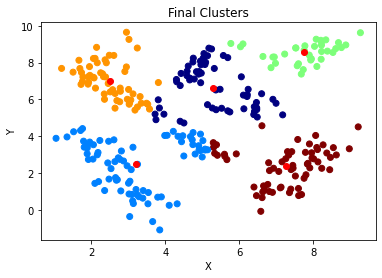

Final centroids:
 [[5.29629878 6.64908797]
 [3.21257461 2.49658087]
 [7.75648325 8.55668928]
 [2.51976116 7.02028909]
 [7.25262683 2.40015826]]
Loss:
 613.9866286066631


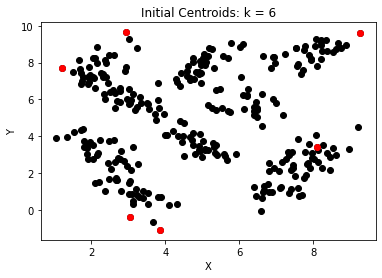

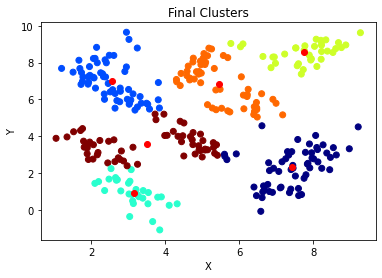

Final centroids:
 [[7.41419243 2.32169114]
 [2.56333815 6.9782248 ]
 [3.14506148 0.90770655]
 [7.75648325 8.55668928]
 [5.46427736 6.83771354]
 [3.49556658 3.56611232]]
Loss:
 476.118751676353


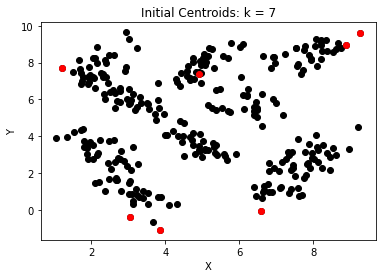

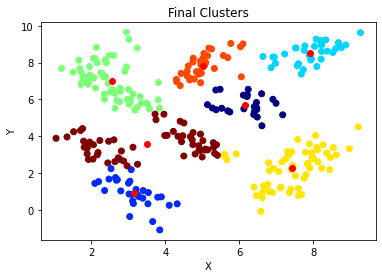

Final centroids:
 [[6.15468228 5.70140721]
 [3.14506148 0.90770655]
 [7.91430998 8.51990981]
 [2.56333815 6.9782248 ]
 [7.42803426 2.28291867]
 [5.0217766  7.82401258]
 [3.49556658 3.56611232]]
Loss:
 397.44812244413686


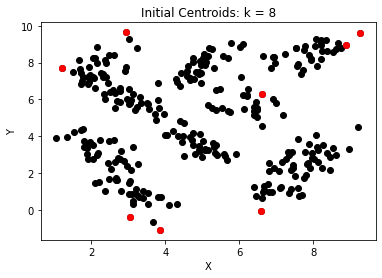

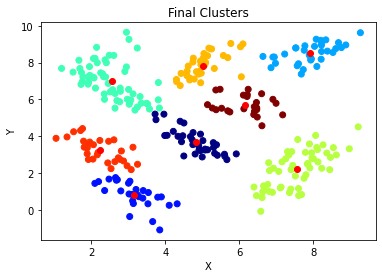

Final centroids:
 [[4.81833058 3.6950232 ]
 [3.16906145 0.81432515]
 [7.91430998 8.51990981]
 [2.56333815 6.9782248 ]
 [7.55616782 2.23516796]
 [5.0217766  7.82401258]
 [2.24204752 3.25100749]
 [6.15468228 5.70140721]]
Loss:
 290.9243344744376


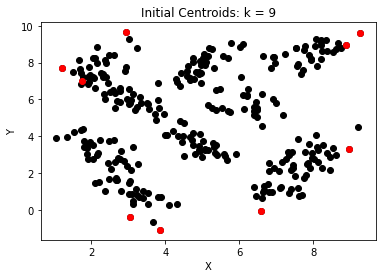

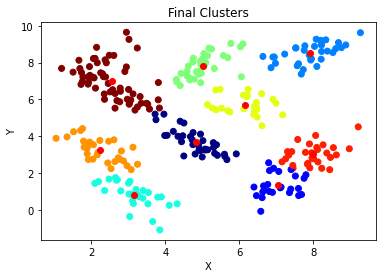

Final centroids:
 [[4.81833058 3.6950232 ]
 [7.05668293 1.33319679]
 [7.91430998 8.51990981]
 [3.16906145 0.81432515]
 [5.0217766  7.82401258]
 [6.15468228 5.70140721]
 [2.24204752 3.25100749]
 [7.98675824 3.01272931]
 [2.56333815 6.9782248 ]]
Loss:
 241.43812287689653


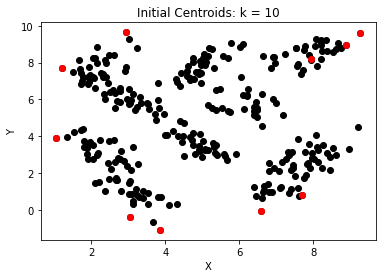

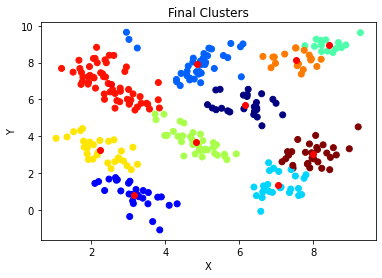

Final centroids:
 [[6.15468228 5.70140721]
 [3.16906145 0.81432515]
 [4.85939875 7.94163821]
 [7.05668293 1.33319679]
 [8.41127011 8.97490383]
 [4.81833058 3.6950232 ]
 [2.24204752 3.25100749]
 [7.52197303 8.160704  ]
 [2.53650108 6.85941978]
 [7.98675824 3.01272931]]
Loss:
 228.26049572465325


In [49]:
# print results k = 2-10, init. 2
err_2 = np.empty(9)
for i in range(2,11):
    init_pt = initial(2, i)
    k_points = kmeans_pp(i, data, init_pt)
    plot_centroids(data, k_points, i)
    result = k_means(data, k_points)
    final_c = result[0]
    final_cluster = result[1]
    err_2[i-2] = loss(data, final_cluster, final_c)
    plot_clusters(data, final_c, final_cluster)
    print('Final centroids:\n', final_c)
    print('Loss:\n', err_2[i-2])

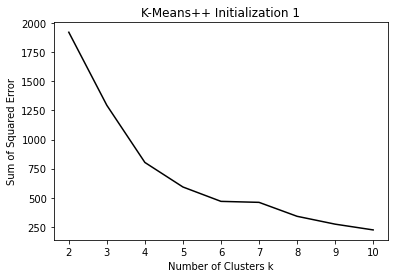

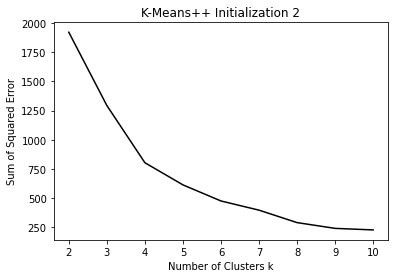

In [50]:
# display objective function for 2 initializations
plot_loss(1, ([2,3,4,5,6,7,8,9,10]), err_1)
plot_loss(2, ([2,3,4,5,6,7,8,9,10]), err_2)